In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_union, make_pipeline

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import spacy
from textblob import TextBlob

In [155]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline

In [156]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV

In [128]:
%matplotlib inline

In [2]:
df = pd.read_csv('./dataframe_all_ds9.csv')

In [3]:
df.head()

,character,ep_title,text
0,LOCUTUS,Emissary,Resistance is futile.
1,LOCUTUS,Emissary,You will disarm your weapons and escort us to ...
2,LOCUTUS,Emissary,"If you attempt to intervene, we will destroy you."
3,LOCUTUS,Emissary,It is malevolent.
4,LOCUTUS,Emissary,Destroy it now.


In [18]:
df.describe()

,character,ep_title,text
count,114487,114487,114487
unique,661,173,93606
top,SISKO,The Way of the Warrior,No.
freq,14023,1344,537


In [13]:
df['character'].value_counts()[:40]

SISKO        14023
KIRA          8963
BASHIR        8668
QUARK         8649
O'BRIEN       8238
ODO           7467
DAX           6016
WORF          3113
GARAK         2854
DUKAT         2612
JAKE          2279
NOG           2092
ROM           2049
EZRI          1697
WEYOUN        1068
WINN           984
MARTOK         951
KEIKO          806
VIC            708
ZEK            704
DAMAR          693
EDDINGTON      641
KASIDY         618
BAREIL         521
COMPUTER       486
SLOAN          482
FOUNDER        474
JOSEPH         407
KOR            405
ISHKA          395
BRUNT          389
ROSS           350
JACK           328
MORA           314
LEETA          311
LWAXANA        288
BILBY          286
TAIN           273
ZIYAL          259
GHEMOR         249
Name: character, dtype: int64

In [15]:
common_chars = df['character'].value_counts()[:40].index

common_chars

In [81]:
df['ep_title'].value_counts()[:10]

The Way of the Warrior       1344
What You Leave Behind        1253
Emissary                     1043
Statistical Probabilities     851
Profit And Lace               796
Far Beyond The Stars          790
Playing God                   784
Rules of Acquisition          781
The Jem'Hadar                 780
Ferengi Love Songs            774
Name: ep_title, dtype: int64

In [82]:
common_chars

Index(['SISKO', 'KIRA', 'BASHIR', 'QUARK', 'O'BRIEN', 'ODO', 'DAX', 'WORF',
       'GARAK', 'DUKAT', 'JAKE', 'NOG', 'ROM', 'EZRI', 'WEYOUN', 'WINN',
       'MARTOK', 'KEIKO', 'VIC', 'ZEK', 'DAMAR', 'EDDINGTON', 'KASIDY',
       'BAREIL', 'COMPUTER', 'SLOAN', 'FOUNDER', 'JOSEPH', 'KOR', 'ISHKA',
       'BRUNT', 'ROSS', 'JACK', 'MORA', 'LEETA', 'LWAXANA', 'BILBY', 'TAIN',
       'ZIYAL', 'GHEMOR'],
      dtype='object')

In [80]:
episode_dictionary = {}

In [39]:
rocks_and_shoals = df.loc[df['ep_title'] == 'Rocks And Shoals']
sentence_count_by_ep = df.groupby(['ep_title', 'character']).count()
sentence_count_by_ep.head()

In [102]:
# ### CURRENT ###

# episode_dictionary = {}
# for title in set(df['ep_title']):
    
#     temp_df = df.loc[df['ep_title'] ==  title]
    
#     episode_dictionary.setdefault(title, {})
    
#     for index, row in temp_df.iterrows():
#         if row['character'] in common_chars:
#             episode_dictionary[title].update({'test': row['character']})
        

In [ ]:
# episode_dictionary = {}


# for title in set(df['ep_title']):
#     episode_dictionary.setdefault('{}'.format(title), {})
    
#     temp_df = df.loc(df['ep_title'] == title)
    

In [65]:
rocks_and_shoals_dict = {}

In [66]:
for index, row in rocks_and_shoals.iterrows():
    if row['character'] in common_chars:
        rocks_and_shoals_dict.setdefault(row['character'], 0)
        rocks_and_shoals_dict[row['character']] += 1

In [67]:
rocks_and_shoals_dict

{'BASHIR': 25,
 'COMPUTER': 2,
 'DAX': 16,
 'GARAK': 35,
 'JAKE': 19,
 'KIRA': 44,
 'NOG': 14,
 "O'BRIEN": 29,
 'ODO': 21,
 'SISKO': 110}

In [105]:
def episode_to_dictionary(df, episode_name):
    temp_df = df.loc[df['ep_title'] == episode_name]
    temp_dict = {}
    for index, row in temp_df.iterrows():
        if row['character'] in common_chars:
            temp_dict.setdefault(row['character'], 0)
            temp_dict[row['character']] += 1
    return temp_dict

In [106]:
episode_to_dictionary(df, 'Rocks And Shoals')

{'BASHIR': 25,
 'COMPUTER': 2,
 'DAX': 16,
 'GARAK': 35,
 'JAKE': 19,
 'KIRA': 44,
 'NOG': 14,
 "O'BRIEN": 29,
 'ODO': 21,
 'SISKO': 110}

In [110]:
episode_dictionary = {}

for episode in set(df['ep_title']):
    episode_dictionary.setdefault(episode, episode_to_dictionary(df, episode))

In [111]:
episode_dictionary

{'A Man Alone': {'BASHIR': 80,
  'COMPUTER': 2,
  'DAX': 46,
  'JAKE': 12,
  'KEIKO': 63,
  'KIRA': 30,
  'NOG': 7,
  "O'BRIEN": 29,
  'ODO': 100,
  'QUARK': 29,
  'ROM': 25,
  'SISKO': 98},
 'A Simple Investigation': {'BASHIR': 47,
  'COMPUTER': 1,
  'DAX': 24,
  'KIRA': 18,
  "O'BRIEN": 16,
  'ODO': 235,
  'QUARK': 6,
  'SISKO': 10,
  'WORF': 7},
 'A Time To Stand': {'BASHIR': 47,
  'DAMAR': 5,
  'DAX': 75,
  'DUKAT': 48,
  'GARAK': 63,
  'JAKE': 17,
  'JOSEPH': 22,
  'KIRA': 69,
  'MARTOK': 11,
  'NOG': 36,
  "O'BRIEN": 49,
  'ODO': 30,
  'QUARK': 28,
  'ROSS': 16,
  'SISKO': 119,
  'WEYOUN': 74,
  'WORF': 8},
 'Accession': {'BASHIR': 58,
  'COMPUTER': 2,
  'DAX': 19,
  'KEIKO': 26,
  'KIRA': 88,
  "O'BRIEN": 92,
  'ODO': 19,
  'QUARK': 18,
  'SISKO': 136,
  'WORF': 8},
 'Afterimage': {'BASHIR': 55,
  'EZRI': 253,
  'GARAK': 150,
  'JAKE': 1,
  'KIRA': 6,
  "O'BRIEN": 15,
  'ODO': 13,
  'QUARK': 38,
  'SISKO': 96,
  'WORF': 38},
 'Apocalypse Rising': {'BASHIR': 35,
  'DAMAR': 8,
  '

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116590048>]], dtype=object)

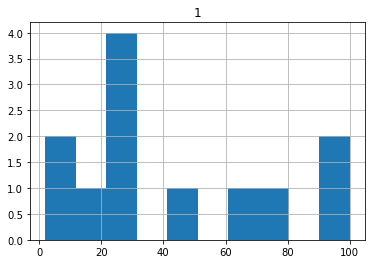

In [130]:
pd.DataFrame(list(zip(episode_dictionary['A Man Alone'].keys(), episode_dictionary['A Man Alone'].values()))).hist()

In [153]:
pd.DataFrame([episode_dictionary['A Man Alone']]).transpose()

,0
BASHIR,80
COMPUTER,2
DAX,46
JAKE,12
KEIKO,63
KIRA,30
NOG,7
O'BRIEN,29
ODO,100
QUARK,29


In [134]:
for each in episode_dictionary['A Man Alone']:
    temp_df = pd.DataFrame(data=episode_dictionary['A Man Alone'][each], index=each)
    print(each, episode_dictionary['A Man Alone'][each])

ValueError: DataFrame constructor not properly called!

In [120]:
episode_dictionary['A Man Alone'].keys()

dict_keys(['DAX', 'BASHIR', 'SISKO', 'ODO', 'QUARK', "O'BRIEN", 'KEIKO', 'KIRA', 'JAKE', 'NOG', 'COMPUTER', 'ROM'])

In [180]:
common_chars

Index(['SISKO', 'KIRA', 'BASHIR', 'QUARK', 'O'BRIEN', 'ODO', 'DAX', 'WORF',
       'GARAK', 'DUKAT', 'JAKE', 'NOG', 'ROM', 'EZRI', 'WEYOUN', 'WINN',
       'MARTOK', 'KEIKO', 'VIC', 'ZEK', 'DAMAR', 'EDDINGTON', 'KASIDY',
       'BAREIL', 'COMPUTER', 'SLOAN', 'FOUNDER', 'JOSEPH', 'KOR', 'ISHKA',
       'BRUNT', 'ROSS', 'JACK', 'MORA', 'LEETA', 'LWAXANA', 'BILBY', 'TAIN',
       'ZIYAL', 'GHEMOR'],
      dtype='object')

In [185]:
common_chars_df = df.loc[df['character'].isin(common_chars)]

In [186]:
common_chars_df.head()

,character,ep_title,text
21,SISKO,Emissary,Reroute auxiliary power.
22,SISKO,Emissary,Full reverse.
23,SISKO,Emissary,Damage report.
24,SISKO,Emissary,Damage report!
25,SISKO,Emissary,"Let's get the civilians to the escape pods, Li..."


In [187]:
X = common_chars_df['text']
y = common_chars_df['character']

In [188]:
cv = CountVectorizer(stop_words='english')
X_cv = cv.fit_transform(X)
feature_names = cv.get_feature_names()

In [189]:
def LDA_batch(X, n):
    lda = LatentDirichletAllocation(n_topics=n)
    lda.fit(X)
    results = pd.DataFrame(lda.components_, columns=feature_names)
    print('LDA for {} topics:'.format(n))
    for topic in range(n):
        print('Topic', topic)
        word_list = results.T[topic].sort_values(ascending=False).index
        print(' '.join(word_list[0:25]), '\n')

In [191]:
LDA_batch(X_cv, 10)

/Users/caroline/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LDA for 10 topics:
Topic 0
time didn station really major sir thank bajor trying kira guess garak ferengi nog haven able matter command heard point rest quite couldn actually killed 

Topic 1
long sisko doing commander talk day new does hear war lot computer glad end chance benjamin aren lost holosuite mission damar different programme trust hard 

Topic 2
just come sure yes cardassian talking place power stay looking night entire klingons weapons gone dead room forget family sir trouble case times week sense 

Topic 3
did tell little starfleet isn sorry hadar jem prophets left coming ships dukat yeah friend means thirty nagus far field waiting easy face turn death 

Topic 4
don want better chief thing quark thought worf course understand mind remember great brien mister wish order rom miles business suppose bring morning looks telling 

Topic 5
know right think way make look mean said life years bajoran wanted julian seven ago space quadrant best ah stand excuse makes true reason deep

In [192]:
LDA_batch(X_cv, 30)

/Users/caroline/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


KeyboardInterrupt: 